In [24]:
from collections.abc import Callable, Iterable
from typing import Optional
import torch
import math
import matplotlib.pyplot as plt

class SGD(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3):
        if lr < 0:
            raise ValueError(f"Invalid learning rate: {lr}")
        defaults = {"lr": lr}
        super().__init__(params, defaults)
    def step(self, closure: Optional[Callable] = None):
        loss = None if closure is None else closure()
        for group in self.param_groups:
            lr = group["lr"] # Get the learning rate.
        for p in group["params"]:
            if p.grad is None:
                continue
            state = self.state[p] # Get state associated with p.
            t = state.get("t", 0) # Get iteration number from the state, or initial value.
            grad = p.grad.data # Get the gradient of loss with respect to p.
            p.data-= lr / math.sqrt(t + 1) * grad # Update weight tensor in-place.
            state["t"] = t + 1 # Increment iteration number.
        return loss

Text(0.5, 1.0, 'Learning rate: 1, Steps: 100')

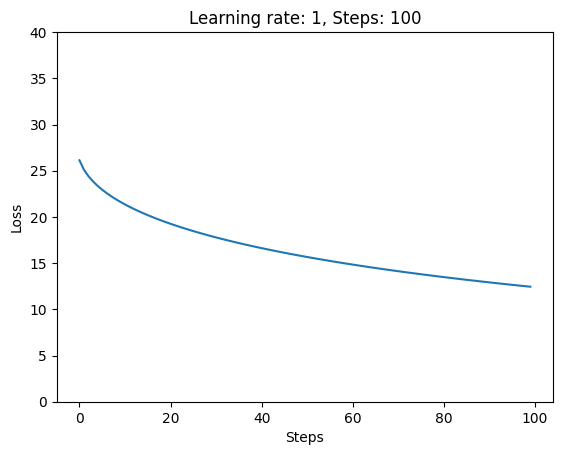

In [25]:
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
lr = 1
steps = 100
opt = SGD([weights], lr=lr)
losses = []
for t in range(steps):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    losses.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step

plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0, 40)
plt.title(f"Learning rate: {lr}, Steps: {steps}")

Text(0.5, 1.0, 'Learning rate: 10.0, Steps: 10')

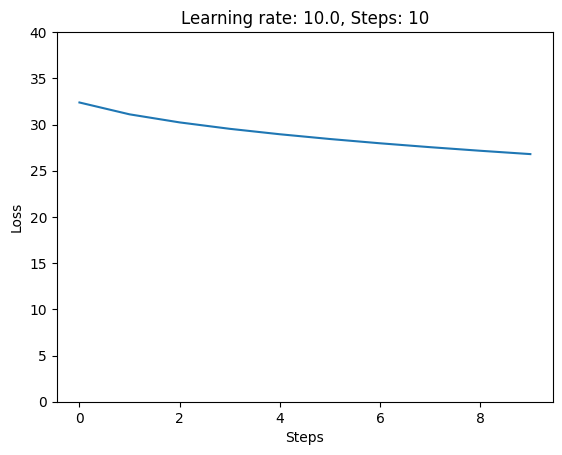

In [ ]:
lr = 1e1
steps = 10
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
opt = SGD([weights], lr=1)
losses = []
for t in range(10):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    losses.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step

plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0, 40)
plt.title(f"Learning rate: {lr}, Steps: {steps}")


Text(0.5, 1.0, 'Learning rate: 100.0, Steps: 10')

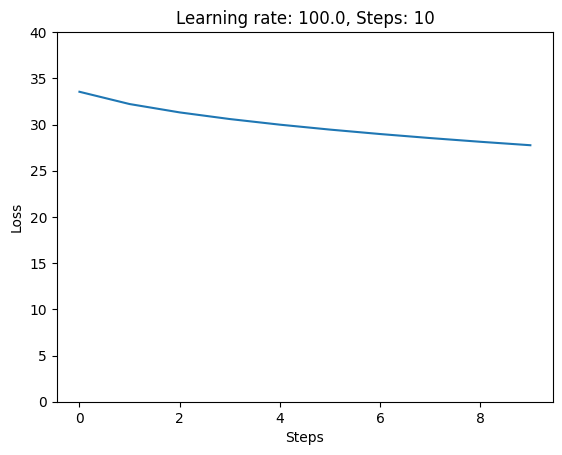

In [27]:
lr = 1e2
steps = 10
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
opt = SGD([weights], lr=1)
losses = []
for t in range(10):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    losses.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step

plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0, 40)
plt.title(f"Learning rate: {lr}, Steps: {steps}")


Text(0.5, 1.0, 'Learning rate: 1000.0, Steps: 10')

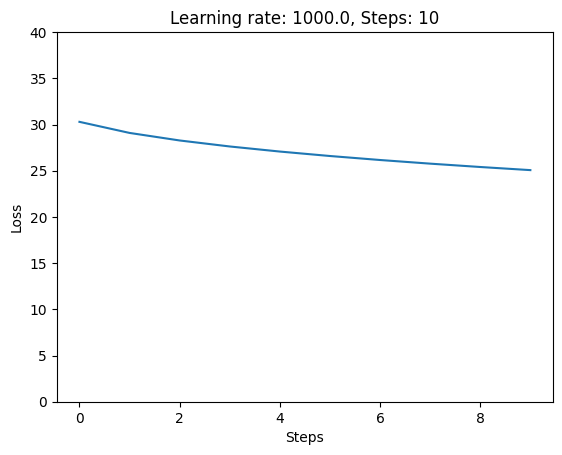

In [28]:
lr = 1e3
steps = 10
weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
opt = SGD([weights], lr=1)
losses = []
for t in range(10):
    opt.zero_grad() # Reset the gradients for all learnable parameters.
    loss = (weights**2).mean() # Compute a scalar loss value.
    losses.append(loss.cpu().item())
    # print(loss.cpu().item())
    loss.backward() # Run backward pass, which computes gradients.
    opt.step() # Run optimizer step

plt.plot(losses)
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.ylim(0, 40)
plt.title(f"Learning rate: {lr}, Steps: {steps}")
